Part I
---


| Var | (a, sigma^2) | n | q | k | Rule | Law |
| --- | --- | --- | --- | --- | --- | --- |
| 5 | (0;9) | 60 | 1.75 | 3 | Стерджеса | Треугольное на отрезке (-2, 4) и модой, равной 1 |


In [144]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import pandas as pd
import math
import statistics

n = 60
a = 0
sigma = 3
q = 1.75

Task 1


In [128]:
sample = sts.norm.rvs(loc=a, scale=sigma, size=n)
print(sample)

[ 0.05885548 -4.11663672 -3.3633028  -4.60672386 -0.89985484 -3.4169577
 -3.83701097  6.06503551 -2.52495685  0.46238216 -2.41746998 -0.34599796
 -0.68682968 -6.0440033   1.06633517 -1.11437957  1.45958919 -0.22662271
  0.52602149  0.77472054 -0.5964042  -2.66409719  3.30227008 -3.31763433
 -1.37305798  2.26584537  4.3829234  -3.76725217 -6.03715235 -5.73578202
  4.71469347  1.74101605  0.38553296  0.78628674  0.89020955  3.15006039
 -4.22433272  1.54655672 -0.62009445 -3.30338429  0.54532501  2.3103467
 -0.42091099  0.2110233   6.71136033  2.40942042 -2.50247331 -1.1687885
 -0.3701035  -4.55555035 -3.41851126  1.96972504 -2.2679054  -3.82210965
 -2.63799862 -1.71864027  0.98023222  0.79115846  0.7203117  -2.18513059]


In [129]:
n_intervals = int(1 + 3.32*math.log10(n))+1
min_smpl = math.floor(sample.min())
max_smpl = math.ceil(sample.max())
h = (max_smpl-min_smpl)/n_intervals

print(n_intervals, min_smpl, max_smpl, h)


7 -7 7 2.0


In [130]:
intervals = []
for i in range(0, n_intervals):
    print(f'{i+1} interval: {min_smpl+i*h} - {min_smpl+(i+1)*h}')
    intervals.append(min_smpl+i*h)
intervals.append(min_smpl+n_intervals*h)


1 interval: -7.0 - -5.0
2 interval: -5.0 - -3.0
3 interval: -3.0 - -1.0
4 interval: -1.0 - 1.0
5 interval: 1.0 - 3.0
6 interval: 3.0 - 5.0
7 interval: 5.0 - 7.0


In [131]:
frequency = []
arraySort = list(sample)
arraySort.sort()
for i in range(0, len(intervals)-1):
    frequency.append(0)
    for j in arraySort:
        if j >= intervals[i] and j <= intervals[i+1]:
            frequency[i] += 1
for i in range(0, len(frequency)):
    print(f'{i+1} interval: {frequency[i]}')
frequency = np.array(frequency)

print(f'\nСумма относительных частот - {(frequency/n).sum()}')



1 interval: 3
2 interval: 12
3 interval: 11
4 interval: 20
5 interval: 8
6 interval: 4
7 interval: 2

Сумма относительных частот - 0.9999999999999999


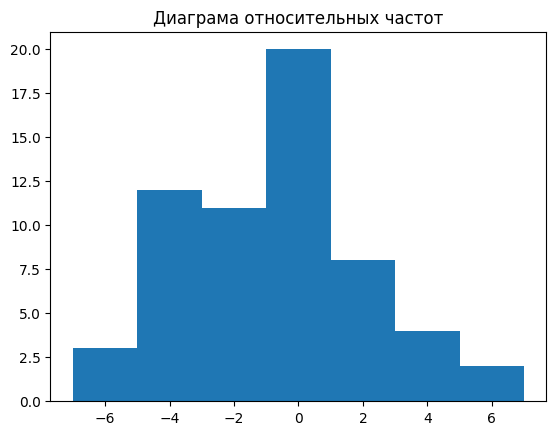

In [132]:
plt.title("Диаграма относительных частот")
plt.stairs(frequency, intervals, fill=True)

In [133]:
my_pdf = frequency/(h*n)
for i in range(0, len(my_pdf)):
    print(f'{i+1} interval: {my_pdf[i]}')
# print(f'Сумма абсолютных частот {tmp.sum()}')

1 interval: 0.025
2 interval: 0.1
3 interval: 0.09166666666666666
4 interval: 0.16666666666666666
5 interval: 0.06666666666666667
6 interval: 0.03333333333333333
7 interval: 0.016666666666666666


[0.025      0.1        0.09166667 0.16666667 0.06666667 0.03333333
 0.01666667]
0.49999999999999994


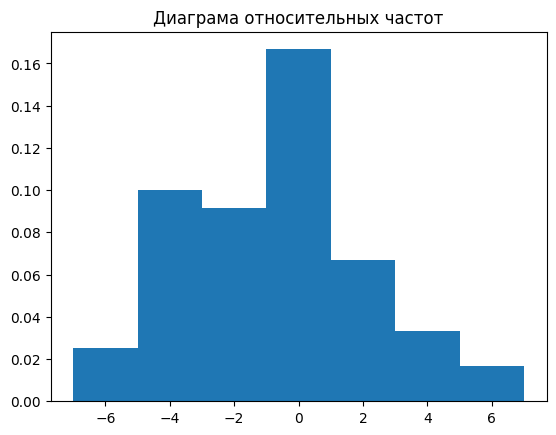

In [134]:
plt.title("Диаграма относительных частот")
plt.stairs(my_pdf, intervals, fill=True)
print(my_pdf)
print(my_pdf.sum())

Task 2

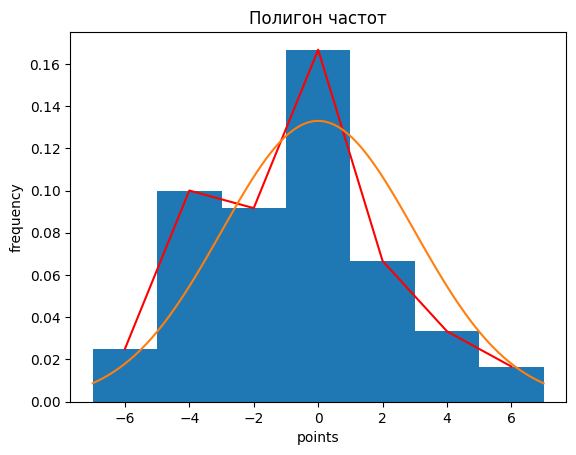

In [135]:
lineY = []
for i in my_pdf:
    lineY.append(i)
lineX = []
for i in range(0, len(intervals)-1):
    lineX.append(intervals[i]+h/2)
plt.stairs(my_pdf, intervals, fill=True)
plt.plot(lineX, lineY, color="red")
x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, sts.norm.pdf(x, a, sigma))
plt.title('Полигон частот')
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()

In [136]:
# check
need_to_be_zero = 0 
for i in frequency/n/h:
    need_to_be_zero+=i*h
print(need_to_be_zero)

0.9999999999999999


Function graph

In [137]:
arrayGraph = []
tmp1= frequency/n
for i in range(0, len(tmp1)):
    arrayGraph.append(0)
    for j in range (0, i):
        arrayGraph[i]+=tmp1[j]
print(tmp1, tmp1.sum())
print(arrayGraph)


cdfY = []
for i in arrayGraph:
    cdfY.append(i)
cdfY.append(1)
cdfX = []
for i in intervals:
    cdfX.append(i)

print((cdfX))
print((cdfY))


[0.05       0.2        0.18333333 0.33333333 0.13333333 0.06666667
 0.03333333] 0.9999999999999999
[0, 0.05, 0.25, 0.43333333333333335, 0.7666666666666666, 0.8999999999999999, 0.9666666666666666]
[-7.0, -5.0, -3.0, -1.0, 1.0, 3.0, 5.0, 7.0]
[0, 0.05, 0.25, 0.43333333333333335, 0.7666666666666666, 0.8999999999999999, 0.9666666666666666, 1]


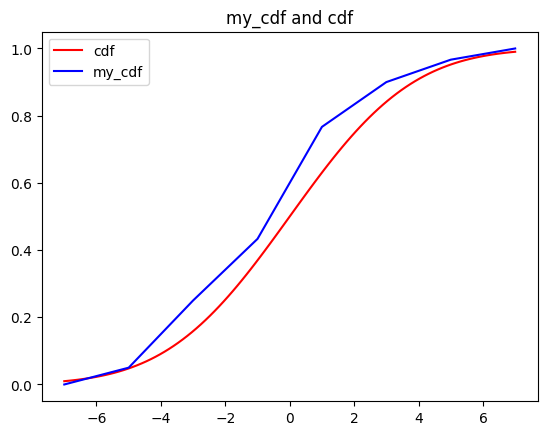

In [138]:
# fig, ax = plt.subplots()
# for i in range(0, len(arrayGraph)):
#     ax.hlines(y=arrayGraph[i], xmin=intervals[i], xmax=intervals[i+1], linewidth=2, color='r')
    
# ax.hlines(y=1, xmin=intervals[len(intervals)-1], xmax=intervals[len(intervals)-1]+10, linewidth=2, color='r')
# ax.hlines(y=0, xmin=intervals[0]-10, xmax=intervals[0], linewidth=2, color='r')
# plt.plot(x, sts.norm.cdf(x, a, sigma))

x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, sts.norm.cdf(x, a, sigma), color="red")

plt.plot(cdfX, cdfY, color="blue")
plt.legend(['cdf', 'my_cdf'])
plt.title("my_cdf and cdf")
plt.show()

,X
0.25,-2.823919
0.50,-0.508658
0.75,0.912715


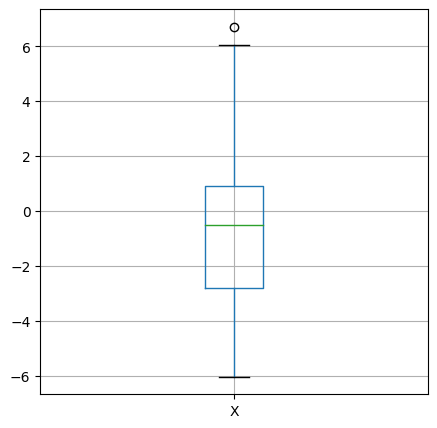

In [139]:
df = pd.DataFrame(data=sample,columns=['X'])
df.boxplot(figsize = (5, 5))
df.quantile([0.25,0.5,0.75])

part 3


In [140]:
print(q)
print(f"Вероятность по таблице {0.04599*2}")
print(f"Вероятность по lib {sts.laplace(scale=sigma).pdf(q)}")
prob = 0
for i in sample:
    if i>-q and i<q:
        prob+=1
prob/=n
print(f"Статистическая {prob}")


1.75
Вероятность по таблице 0.09198
Вероятность по lib 0.09300585762834118
Статистическая 0.4666666666666667


In [151]:
tem1 = frequency/n
sample 

my_mean = statistics.mean(sample)
my_variacne = statistics.variance(sample)
my_dev = math.sqrt(my_variacne)
my_skewness = sts.skew(sample)
my_kurtosis = sts.kurtosis(sample)
print(f'mean - {my_mean}, \nvariacne - {my_variacne}, \ndev - {my_dev}, \nSkewness - {my_skewness}, \nKurtosis - {my_kurtosis}')


mean - -0.668013727796634, 
variacne - 8.2446868253043, 
dev - 2.8713562693097314, 
Skewness - 0.2862046101725963, 
Kurtosis - -0.1807146455945312


In [164]:
X = sample.sum()/len(sample)
print(f'Первый эмпирический момент: {X}')
s2 = 0
for i in sample:
    s2 += (i-X)**2
s2 = s2/len(sample)
print(f'Эмпирическая дисперсия: {s2}')
print(f'Стандартное отклонение: {math.sqrt(s2)}')

x4 = 0
s3 = 0
s4 = 0
for i in sample:
    x4 += math.pow(i, 4)
    s3 += math.pow((i-X), 3)
    s4 += math.pow((i-X), 4)
x4 /= len(sample)
s3 /= len(sample)
s4 /= len(sample)
print(f'Коэффициент ассимметрии: {s3/math.pow(math.sqrt(s2), 3)}')
print(f'Коэффициент эксцесса: {s4/math.pow(s2, 2)-3}')

Первый эмпирический момент: -0.6680137277966341
Эмпирическая дисперсия: 8.107275378215894
Стандартное отклонение: 2.84732776093935
Коэффициент ассимметрии: 0.2862046101725962
Коэффициент эксцесса: -0.1807146455945312


Part II
---
